# **Haar feature classifer**

In [ ]:
!pip install scikit-learn
!pip install -c conda-forge scikit-image
!pip install -c menpo opencv3
!pip install common

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'menpo'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for common: filename=common-0.1.2-py3-none-any.whl size=3731 sha256=6bc2ee70d66cbb33381162d3fd15d21e9ccd57a1308062f8df0e898b8fe82782
  Stored in directory: /root/.cache/pip/wheels/ec/b0/bf/d38cbc0eb5079d61cc5e94280603e7b5756f502edc072c7319
Successfully built common


In [ ]:
from sklearn import preprocessing

**Viola-Jomes: Face detection**

https://realpython.com/traditional-face-detection-python/

**Integral image** The integral image is defined as the summation of the pixel values of the original image. The value atany location (x, y) of the integral image is the sum of the image‟ s pixels above and to the left of location (x, y)

**Hear feature classifier** A Haar feature classifier uses the rectangle integral to calculate the value of a feature. The Haar feature classifier multiplies the weight of each rectangle by its area and the results are added together.

**Stage cascading** It is possible to eliminate the false candidate quickly using stage cascading. The cascade eliminates candidate if it not passed the first stage. If it passed than send it to next stage which is more complicated than previous one. If a candidate passed all the stage, this means a face is detected

 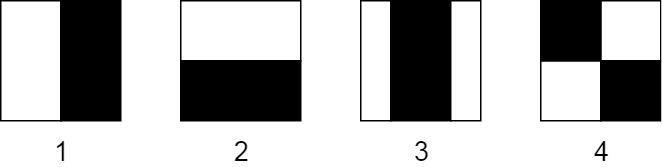

Archives here (haarcascades xml):
https://github.com/opencv/opencv/tree/master/data/haarcascades

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
# these imports let use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets draw inline pictures in the notebooks
import pylab # this allows to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [ ]:
!git clone https://github.com/opencv/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 314549, done.
remote: Total 314549 (delta 0), reused 0 (delta 0), pack-reused 314549
Receiving objects: 100% (314549/314549), 501.68 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (219081/219081), done.
Updating files: 100% (7058/7058), done.


In [ ]:
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-1-passport photo.jpg')
# Convert color image to grayscale for Viola-Jones
grayscale_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
# Load the classifier and create a cascade object for face detection
face_cascade = cv.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml')

The face_cascade object has a method detectMultiScale(), which receives an image as an argument and runs the classifier cascade over the image. The term MultiScale indicates that the algorithm looks at subregions of the image in multiple scales, to detect faces of varying sizes:

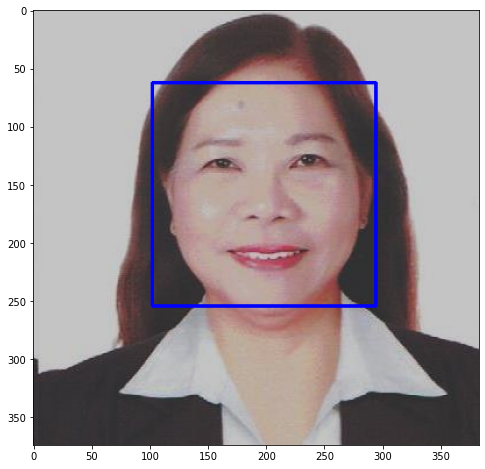

In [ ]:
detected_faces = face_cascade.detectMultiScale(grayscale_image)
for (x,y,w,h) in detected_faces:
     cv2.rectangle(original_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

**Smile and eye Detection**

We will use the pre-trained model haarcascade_smile.xml to detect smiles on the pictures.

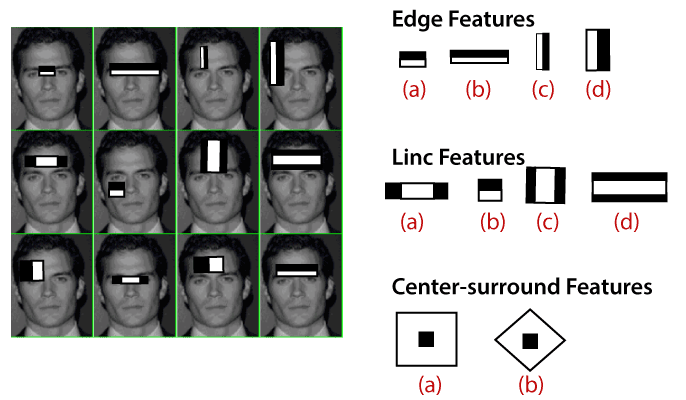

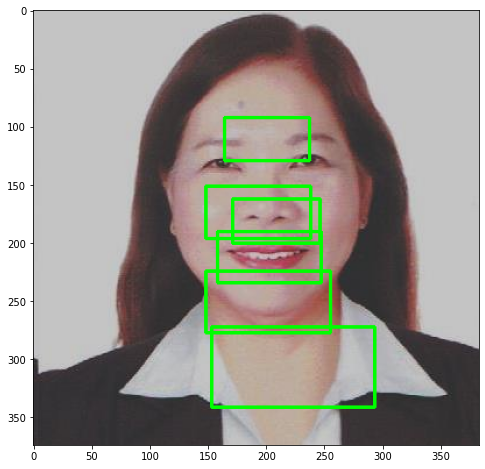

In [ ]:
# this is a pre-trained face cascade
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-1-passport photo.jpg')
smile_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grayscale_image)
for (x,y,w,h) in smiles:
     cv2.rectangle(original_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

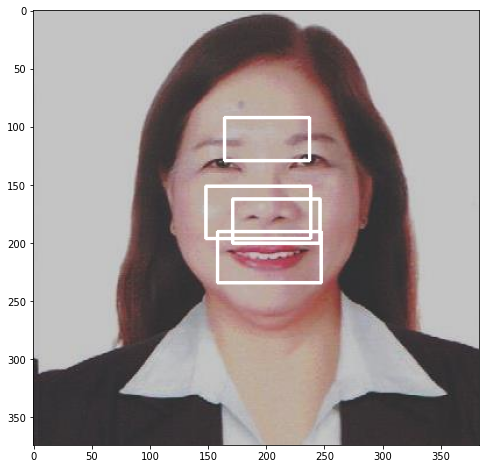

In [ ]:
# this is a pre-trained face cascade
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-1-passport photo.jpg')
for (x,y,w,h) in detected_faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    #print(x_s)
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(original_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

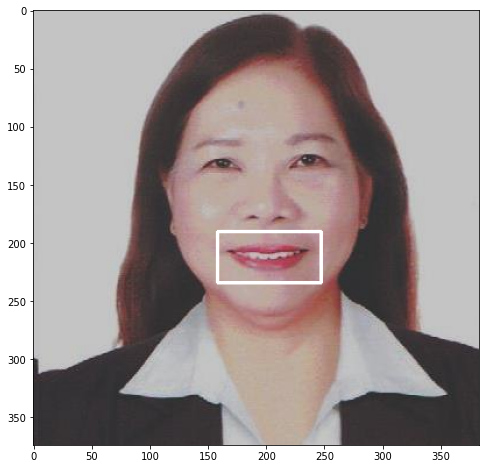

In [ ]:
import threading
# this is a pre-trained face cascade
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-1-passport photo.jpg')
for (x,y,w,h) in detected_faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  #Selecting a range for smiles
  xf=0
  yf=0
  wf=0
  hf=0
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      if y_s>yf:
        xf=x_s
        yf=y_s
        wf=w_s
        hf=h_s
  cv2.rectangle(original_image, (xf,yf),(xf+wf,yf+hf),(255,255,255),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

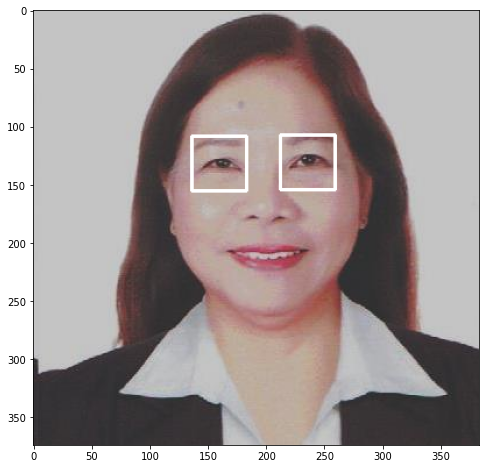

In [ ]:
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-1-passport photo.jpg')
eye_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grayscale_image)
for (x,y,w,h) in eyes:
     cv2.rectangle(original_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

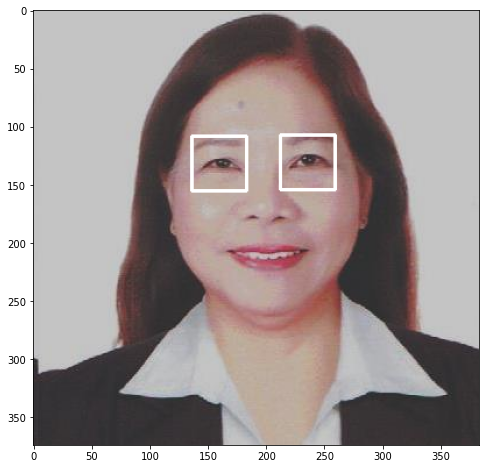

In [ ]:
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-1-passport photo.jpg')
for (x,y,w,h) in detected_faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(original_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

**Putting all together**
A simple tweak to the scale factor compensates for this so can move that parameter around. For example, scaleFactor=1.2 improved the results.

In [ ]:
from numpy.lib.utils import info
#Method identify face
def find_face(imgArr,scaleFactor):
  face_cascade = cv.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml')
  grayscale_image = cv.cvtColor(imgArr, cv.COLOR_BGR2GRAY)
  detected_faces = face_cascade.detectMultiScale(grayscale_image, scaleFactor=scaleFactor, minNeighbors=5)

  smile_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_smile.xml')
  grayscale_image2 = cv.cvtColor(imgArr, cv.COLOR_BGR2GRAY)
  smiles = smile_cascade.detectMultiScale(grayscale_image2, scaleFactor=scaleFactor, minNeighbors=5)

  eye_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_eye.xml')
  grayscale_image3 = cv.cvtColor(imgArr, cv.COLOR_BGR2GRAY)
  eyes = eye_cascade.detectMultiScale(grayscale_image3, scaleFactor=scaleFactor, minNeighbors=5)

  for (x,y,w,h) in detected_faces:
    cv.rectangle(imgArr,(x,y),(x+w,y+h),(255,0,0),2)
    xf=0
    yf=0
    wf=0
    hf=0
    for (x_s,y_s,w_s,h_s) in eyes:
      if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
        ya=y_s
        cv2.rectangle(imgArr, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
    for (x_s,y_s,w_s,h_s) in smiles:
      if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
        if y_s>yf:
          xf=x_s
          yf=y_s
          wf=w_s
          hf=h_s
    if yf==0:
      print("This person is not smiling")
    else:
      print("This person is smilling")
    if ya<yf:
      print("Right image")
  cv2.rectangle(imgArr, (xf,yf),(xf+wf,yf+hf),(255,255,255),2)
  plt.imshow(cv2.cvtColor(imgArr, cv2.COLOR_BGR2RGB))

In [ ]:
eyes

array([[136, 108,  47,  47],
       [212, 107,  47,  47]], dtype=int32)

In [ ]:
smiles

array([[164,  92,  73,  37],
       [158, 190,  89,  44],
       [148, 151,  90,  45],
       [171, 162,  75,  38],
       [148, 224, 107,  53],
       [153, 272, 140,  69]], dtype=int32)

This person is smilling
Right image


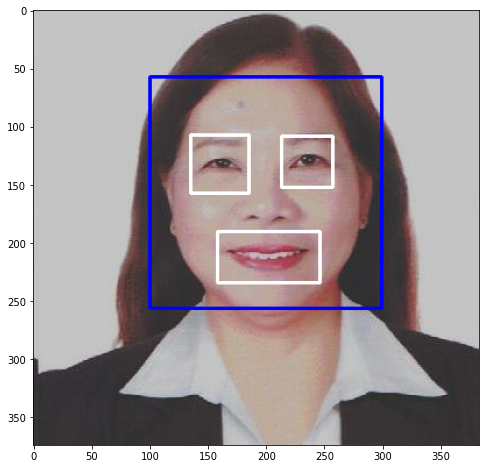

In [ ]:
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-1-passport photo.jpg')
find_face(original_image,1.2)

In [ ]:
t1 = time.time()
for image in os.listdir("/content/gdrive/MyDrive/Vision_Artificial/Some_Images"):
   path="/content/gdrive/MyDrive/Vision_Artificial/Some_Images/" + image
   print(image)
   original_image = cv.imread(path)
   find_face(original_image,1.2)
t2 = time.time()
dt1 = t2 - t1
print(dt1)

NameError: ignored

Haar method is usefful for identify faces, but, we can't identify sentiment for a person, in passport photos we need neutral expresion. It's useful haar method and machine learning methods.

**Local Binary Pattern**

The Local Binary Pattern (LBP) is an image descriptor commonly used for classification and retrieval. Introduced by Ojala et al. (Ojala et al., 2002)
for texture classification, they are characterized by invariance to monotonic changes in illumination and
low processing cost.
Given a pixel, the LBP operator thresholds the circular neighborhood within a distance by the pixel gray
value, and labels the center pixel considering the result as a binary pattern.

In [ ]:
def getLBPimage(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(gray_image)
    neighboor = 3
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            ### Step 1: 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            img01_vector = np.delete(img01_vector,4)
            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

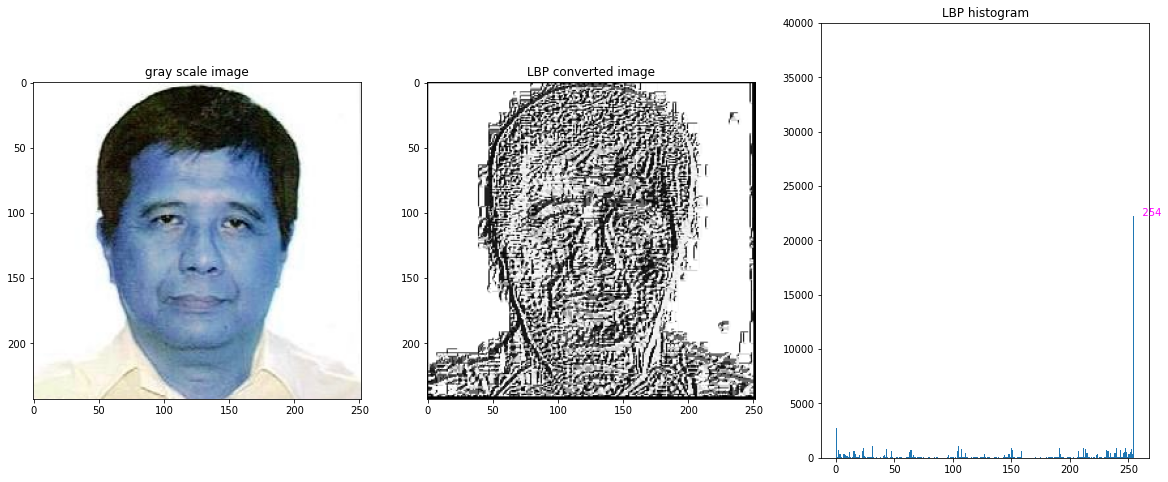

In [ ]:
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-2-passport photo.jpeg')
imgLBP = getLBPimage(original_image)
vecimgLBP = imgLBP.flatten()
fig = plt.figure(figsize=(20,8))
ax  = fig.add_subplot(1,3,1)
ax.imshow(original_image)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
ax.set_ylim(0,40000)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
    ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

In [ ]:
import time

In [ ]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    img_copy = colored_img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img_copy

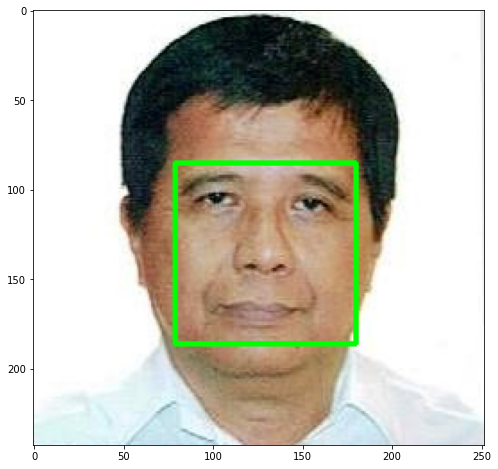

In [ ]:
test2 = cv2.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-2-passport photo.jpeg')
lbp_face_cascade = cv2.CascadeClassifier('/content/opencv/data/lbpcascades/lbpcascade_frontalface_improved.xml')
faces_detected_img = detect_faces(lbp_face_cascade, test2)
plt.imshow(convertToRGB(faces_detected_img))

In [ ]:
from numpy.lib.utils import info
#Method identify face
def find_face_LBP(imgArr,scaleFactor):
  face_cascade = cv.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml')
  grayscale_image = cv.cvtColor(imgArr, cv.COLOR_BGR2GRAY)
  detected_faces = lbp_face_cascade.detectMultiScale(grayscale_image, scaleFactor=scaleFactor, minNeighbors=5)

  smile_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_smile.xml')
  grayscale_image2 = cv.cvtColor(imgArr, cv.COLOR_BGR2GRAY)
  smiles = smile_cascade.detectMultiScale(grayscale_image2, scaleFactor=scaleFactor, minNeighbors=5)

  eye_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_eye.xml')
  grayscale_image3 = cv.cvtColor(imgArr, cv.COLOR_BGR2GRAY)
  eyes = eye_cascade.detectMultiScale(grayscale_image3, scaleFactor=scaleFactor, minNeighbors=5)

  for (x,y,w,h) in detected_faces:
    cv.rectangle(imgArr,(x,y),(x+w,y+h),(255,0,0),2)
    xf=0
    yf=0
    wf=0
    hf=0
    ya=0
    for (x_s,y_s,w_s,h_s) in eyes:
      if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
        cv2.rectangle(imgArr, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
        ya=y_s
    for (x_s,y_s,w_s,h_s) in smiles:
      if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
        if y_s>yf:
          xf=x_s
          yf=y_s
          wf=w_s
          hf=h_s
    if yf==0:
      print("This person is not smiling")
    else:
      print("This person is smilling")
    if ya<yf:
      print("Right image")
  cv2.rectangle(imgArr, (xf,yf),(xf+wf,yf+hf),(255,255,255),2)
  plt.imshow(cv2.cvtColor(imgArr, cv2.COLOR_BGR2RGB))

This person is smilling
Right image


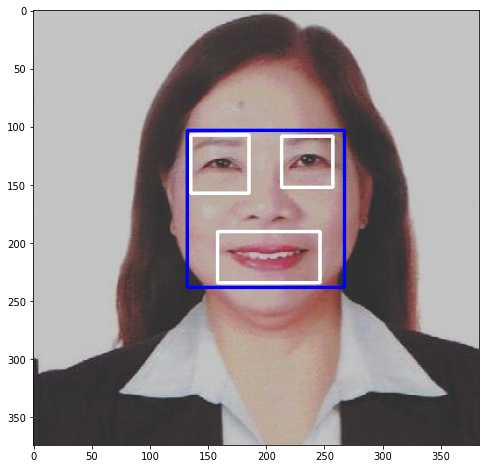

In [ ]:
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-1-passport photo.jpg')
find_face_LBP(original_image,1.2)

171901-2-passport photo.jpeg
This person is not smiling
171901-1-passport photo.jpg
This person is smilling
Right image
Copia de m4002.jpg
This person is smilling
Right image
Copia de f4002s.jpg
This person is smilling
Right image
Copia de f4026s.jpg
This person is smilling
Right image
Copia de f4026.jpg
This person is smilling
Right image
Copia de f4018s.jpg
This person is smilling
Copia de f4027.jpg
This person is smilling
Right image
Copia de f4018.jpg
This person is smilling
Copia de m4068s.jpg
This person is smilling
Right image
Copia de m4079.jpg
This person is smilling
Copia de m4078.jpg
This person is smilling
Copia de m4079s.jpg
This person is smilling
Copia de m4080s.jpg
This person is smilling
Right image
20.335339784622192


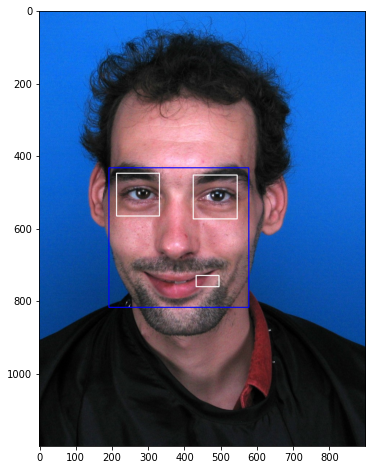

In [ ]:
import os
t1 = time.time()
for image in os.listdir("/content/gdrive/MyDrive/Vision_Artificial/Some_Images"):
   path="/content/gdrive/MyDrive/Vision_Artificial/Some_Images/" + image
   print(image)
   original_image = cv.imread(path)
   find_face_LBP(original_image,1.2)
t2 = time.time()
dt2 = t2 - t1
print(dt2)

In [ ]:
print("Code with Haar",dt1)
print("Code with LBP",dt2)

For smile and other features cascade detection is better use Haar because I use Haar cascade to detect eyes and smile. LBP has shorter training time but if we use only this mehtod. Both methods have the same results.

Source for adjust LBP: https://www.superdatascience.com/blogs/opencv-face-detection

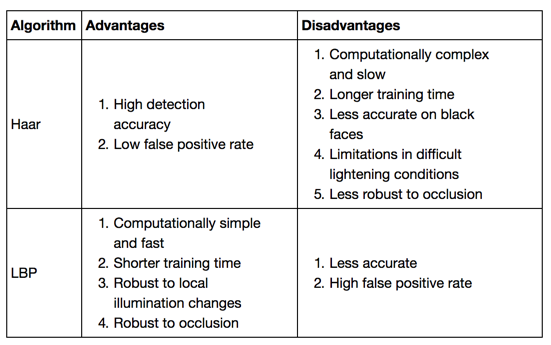

**Background detection**

I identified background color with threshold

In [ ]:
def find_white_background(imgArr, threshold=0.3):
    """remove images with transparent or white background"""
    background = np.array([255, 255, 255])
    percent = (imgArr == background).sum() / imgArr.size
    if percent >= threshold:
        print(percent)
        return True
    else:
        return False

In [ ]:
original_image = cv.imread('/content/gdrive/MyDrive/Vision_Artificial/Some_Images/171901-2-passport photo.jpeg')
find_white_background(original_image)

0.34912469789013


True

In [ ]:
for image in os.listdir("/content/gdrive/MyDrive/Vision_Artificial/Some_Images"):
   path="/content/gdrive/MyDrive/Vision_Artificial/Some_Images/" + image
   original_image = cv.imread(path)
   print(find_white_background(original_image))

0.34912469789013
True
False
False
False
False
False
False
False
False
False
False
False
False
False


Background detection, detects only white background.

# **Machine learning model**

Adaptation of; https://www.kaggle.com/datasets/aadityasinghal/facial-expression-dataset?select=train

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install livelossplot
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Generate batches of tensor image data
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
from livelossplot.inputs.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.11.0


In [ ]:
for expression in os.listdir("/content/gdrive/MyDrive/Vision_Artificial/Expressions/Train"):
    print(str(len(os.listdir("/content/gdrive/MyDrive/Vision_Artificial/Expressions/Train/" + expression))) + " " + expression + " images")

4097 fear images
436 disgust images
3995 angry images
3171 surprise images
4830 sad images
4965 neutral images
7215 happy images


Reduce image size to 48x48

In [ ]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("/content/gdrive/MyDrive/Vision_Artificial/Expressions/Train",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("/content/gdrive/MyDrive/Vision_Artificial/Expressions/Test",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In Keras, a Sequential model can be built by using the Sequential()class. Here, we sequentially add layers to the model using the add()method. A convolution is a linear operation that involves the multiplication of a set of weights with the input, much like a traditional neural network. The multiplication is performed between an array of input data and a two-dimensional array of weights, called a filter or a kernel.

https://towardsdatascience.com/coding-a-convolutional-neural-network-cnn-using-keras-sequential-api-ec5211126875

Each pooling layer in a CNN is created using the MaxPooling2D()class that simply performs the Max pooling operation in a two-dimensional space.

Dropout is a technique where randomly selected neurons are ignored during training.

Here for all the four convolution layers all the parameters except Conv2D are kept same. for the first Conv we have also mentioned input size, the size of the image to be received.

finally, I use RELU activation

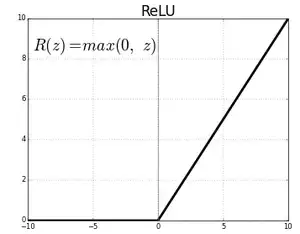

But after all the above layers we will finally add a Dense Layer layer with activation set as Softmax which turns numbers aka logits into probabilities that sum to one.

In [ ]:
# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


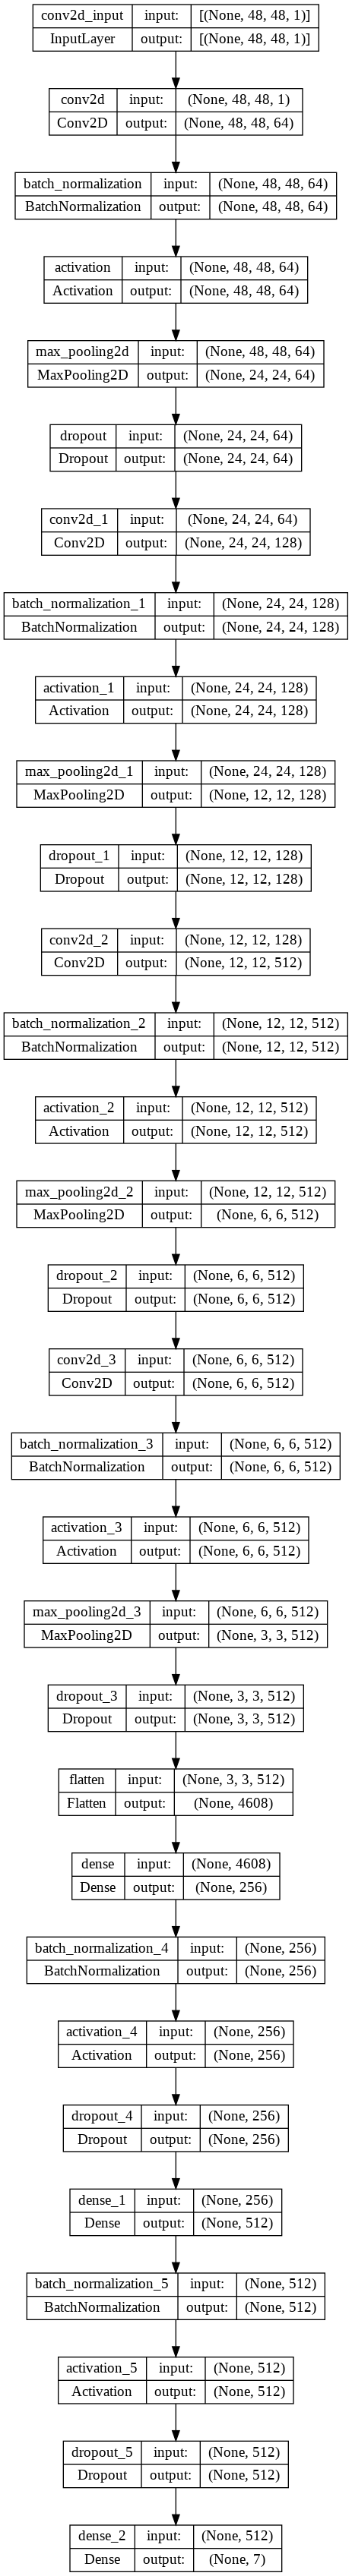

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=2400)

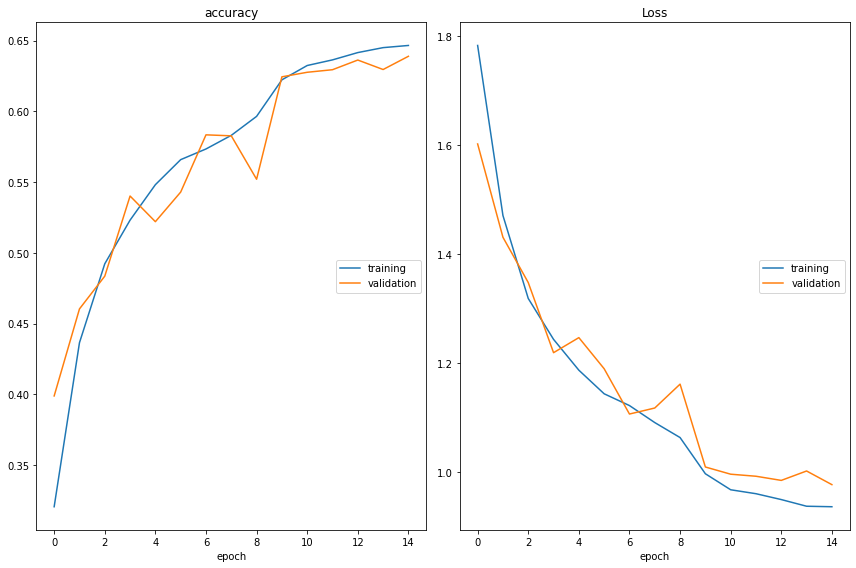

accuracy
	training         	 (min:    0.321, max:    0.647, cur:    0.647)
	validation       	 (min:    0.399, max:    0.639, cur:    0.639)
Loss
	training         	 (min:    0.937, max:    1.783, cur:    0.937)
	validation       	 (min:    0.978, max:    1.602, cur:    0.978)

Epoch 15: saving model to model_weights.h5
448/448 [==============================] - 974s 2s/step - loss: 0.9371 - accuracy: 0.6466 - val_loss: 0.9776 - val_accuracy: 0.6390 - lr: 5.0000e-05
CPU times: user 7h 21min 2s, sys: 10min 14s, total: 7h 31min 16s
Wall time: 5h 32min 23s


In [ ]:
#Train model and evaluation steps
%%time
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save_weights('model_weights.h5')
data=model.save_weights('model_weights.h5')
with open("model.json", "w") as json_file:
    json_file.write(model_json)
with open("/content/drive/MyDrive/Vision_Artificial/model.json", "w") as f:
    json.dump(data,f)

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now we will write a Python code for loading the model and weights and making Predictions.

In [ ]:
from tensorflow.keras.models import model_from_json
class FacialExpressionModel(object):
    EMOTIONS_LIST = ["Angry", "Disgust",
                    "Fear", "Happy",
                    "Neutral", "Sad",
                    "Surprise"]
    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)
        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()
    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]

USe CV2 to identify face, then we use saved model to classify sentiment

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


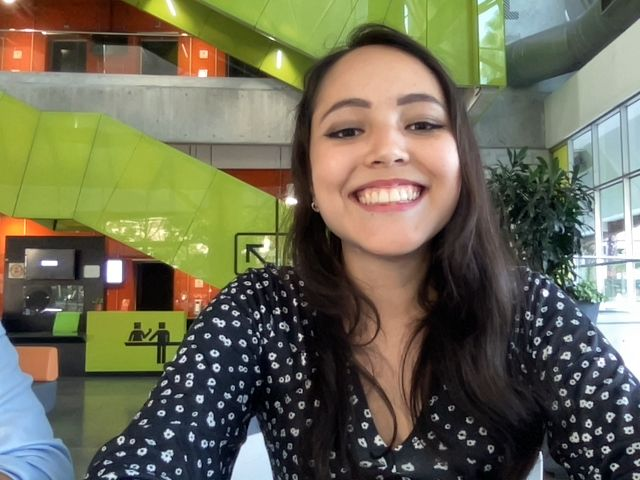

In [ ]:
#https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
facec = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model.json", "model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX

path="/content/photo.jpg"
fr = cv2.imread(path)
gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
faces = facec.detectMultiScale(gray_fr, 1.3, 5)
for (x, y, w, h) in faces:
   fc = gray_fr[y:y+h, x:x+w]
   roi = cv2.resize(fc, (48, 48))
   pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
   cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
   cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(fr, cv2.COLOR_BGR2RGB))